# PY52007 - Week 1

## Dr Benjamin Vincent

# Goals

What we _are_ trying to do:

- provide a detailed view of how traditional hypothesis testing works
- provide some intuition and understanding of what p-values can and cannot tell you
- to give a brief exposure to simulation approaches in statistical inference
- to expose you to some of the criticisms of the hypothesis testing approach
- to give you enough insight to understand and to start asking dangerous questions.

What we are _not_ trying to do:

- to loose faith in the relevance of traditional hypothesis testing
- teach you programming, either in R or Python
- to give you all the answers. 
  - Ben is a Bayesian and does not have all the frequentist hypothesis testing answers. 
  - You are at the stage where you should be asking detailed questions about the statistical procedures and researching the answers for yourself.
  - This is a very broad and deep topic, there is no way to cover all important issues in one seminar.

# Recap of statistical inference

In PY51001 Research Foundations, we ended with a high level overview of how we learn from data, that is, how we conduct statistical inference. In that seminar we discussed the approach underlying traditional hypothesis testing versus Bayesian inference.

![](figs/overview.png)

In this lecture we will dive deeper into the approach underlying traditional (frequentist) hypothesis testing. In particular we will look at how we deduce what we expect to see under the null hypothesis. One approach is to use analytic methods to end up with mathematical descriptions of what we expect to see if the null hypothesis is true. However, there is a simpler approach where we can simulate what we expect under the null hypothesis.

The simulation approach can be done on a computer relatively easily. It will involve a small bit of code, but this should be relatively clear to understand, at least at the conceptual level. While the language "R" is very popular in psychological research these days, today we will be using Python to demonstrate these things. This should not make any material difference to your understanding of the ideas or concepts at hand. You do not need to know R or Python to follow along here.

# The 'logic' of frequentist hypothesis testing

There are many different statistical tests. It can be confusing which one you should use and why. What are all the different statistics and where do they come from? We can think about this in a simpler way:

By thinking about simulating experiments (rather than doing maths), we can see that there is only one core procedure used in the hypothesis testing approach.

![Figure by Allen Downney from this blog post http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html](figs/flow.png)
Figure by Allen Downney from this blog post http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html

The **data** is relatively straightforward. It is just a table of data that you have collected. You might have columns for different measures and rows for each observation.

In order to test your **hypothesis**, you construct a **test statistic**. This takes your data and reduces it to a single number which captures the size of the effect that you are interested in. Example hypotheses could be:

- The _mean_ of group A is different than group B. 
- The _median_ of group A is different than group B. (Might be more robust to outliers).
- The _mean_ of group A is higher than group B. (A directional hypothesis). 
- Each individual increased their score from condition A to condition B. (As in a repeated measures context).
- Etc.

We could come up with a whole range of statistics (ways of converting a dataset into an effect size) which test different hypotheses. We will look at an example below.

Then the heart of the hypothesis testing approach comes in... You need to work out what are the chances of seeing an effect (a test statistic), for your particular dataset, as big as this **by chance**. If your effect size is low, then it is more consistent with chance as compared to if your effect size is large. 

So how do we do this, specifically? We define a **null hypothesis**, $H_0$, which states what we would expect to see if there is no effect. This is the 'top down' or deductive approach, where we say, "assuming the null and a certain experiment structure and a certain sample size, then I expect to see this."

This allows you to work out the consistency (also known as the likelihood) of the data given the null hypothesis, which we could call $P(data|H_0)$.

# Example: is this dice fair?
In this example, inspired by the blog post [There is only one test!](http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html) by Allen Downey, we run through the logic looking at whether we have a biased dice.

We run a gambling casino and suspect a person to be using a biased dice. We confiscate the dice and run an experiment. We roll the dice 60 times and count how many times we get a 1, 2, 3, ... 6.

It is common to use examples of rolling dice or flipping coins. This does not restrict ourselves to studying these exact things - they are simple examples of "statistical processes" but which have a very understandable physical interpretation. This can help our thinking about the way in which data is generated.

So yes we will talk about biased dice, but this is a very general statistical process. First, we are not restricted to a normal 6-sided dice, we can imagine a dice with any number of sides. In the limit we have a 2-sided dice (which is functionally a coin), but equally we could have a 3-sided dice, or a 7-sided dice.

By way of example, we could imagine that we are studying response data from a 5-point Likert scale. We can think of peoples' responses are being biased dice rolls. Maybe the dice is unbiased and we would observe roughly similar numbers of responses to all 5 Likert levels. But maybe this is not the case, maybe responses cluster around 2 in one condition, with some variation. We can imagine this as a biased dice where the bias is somthing like `p = [0.2, 0.4, 0.2, 0.1, 0.1]`. If you tested 100 participants then you would _expect_ the number of responses for each Likert level to be `[20, 40, 20, 10, 10]`. In the example below, we will explore how to test whether the data we observe is due to the null hypothesis (i.e. that the responses are unbiased). If so, we might expect to see the following counts of responses `[20, 20, 20, 20, 20]`. The observed response frequencies are different from what we would expect from unbiased responses, but how do we know if this is due to random chance or not?

Initially, we just do a bit of setup for the Python code to follow:

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 16})

from numpy import percentile
from random import randint

The first thing we must do is to choose a statistic. Here we will use the Chi Squared statistic.

In [3]:
def ChiSquared(expected, observed):
    return sum([(obs - exp)**2 / exp for obs, exp in zip(observed, expected)])

The second thing we do is to simulate the results of an experiment in order to calculate what we would expect to happen under the null hypothesis that the dice is fair.

We can guess that it is quite likely that given 60 rolls of a 6 sided dice, on average each side might be observed 10 times. Although seeing exactly this is not always going to happen because of randomness. So here we simulate rolling a side with `randint(1, 6)` which asks the computer to roll a 6 sided dice and tell us what happened. We repeat this many times and so we get a set of 60 observations of what side came up. Finally, our actual raw data will be raw observations, but will will count up the frequency that each side of the dice appeared.

In [4]:
sides = 6
num_rolls = 60
rolls = [randint(1, sides) for _ in range(num_rolls)]
rolls

[6,
 5,
 5,
 5,
 3,
 5,
 3,
 6,
 6,
 4,
 2,
 6,
 1,
 2,
 5,
 3,
 3,
 6,
 1,
 3,
 5,
 1,
 6,
 1,
 2,
 1,
 3,
 3,
 1,
 6,
 4,
 6,
 6,
 4,
 3,
 2,
 6,
 3,
 3,
 3,
 1,
 1,
 1,
 5,
 6,
 5,
 1,
 1,
 2,
 3,
 1,
 5,
 4,
 1,
 5,
 6,
 5,
 6,
 4,
 2]

In [5]:
[rolls.count(n) for n in range(1, sides+1)]

[13, 6, 12, 5, 11, 13]

In [7]:
def SimulateRolls(sides, num_rolls):
    # roll dice many times
    rolls = [randint(1, sides) for _ in range(num_rolls)]
    # count how many of each side of the dice we got
    return [rolls.count(n) for n in range(1, sides+1)]

To make sure we understand what this does, let us run it a few times and see the results. Each number represents the frequency that we observe each side of the dice given we rolle the dice `num_rolls` times.

In [8]:
SimulateRolls(6, 10)

[1, 2, 1, 1, 1, 4]

In [9]:
SimulateRolls(6, 60)

[13, 9, 10, 6, 9, 13]

In [11]:
SimulateRolls(6, 60_000)

[9967, 9912, 10121, 10110, 9927, 9963]

And just to demonstrate the point, we can simulate rolling a 3 sided dice as well.

In [ ]:
SimulateRolls(3, 600)

Now we do some 'setup' in that we describe the sides of the dice, the number of simulations we will run, and the number of dice rolls (i.e. the sample size).

In [12]:
sides = 6
num_rolls = 60
num_simulations = 100_000

Now we create our expected data

In [13]:
expected_proportion = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
expected_data = [int(prop * num_rolls) for prop in expected_proportion]
print(f'expected_data = {expected_data}')

expected_data = [10, 10, 10, 10, 10, 10]


In [17]:
expected_data

[10, 10, 10, 10, 10, 10]

In [18]:
observed_data

[10, 10, 10, 10, 5, 15]

In [19]:
ChiSquared(expected_data, observed_data)

5.0

Now we create some actual observed data that we may have got from an experiment.

In [15]:
observed_proportion = [2/12, 2/12, 2/12, 2/12, 1/12, 3/12]
observed_data = [int(prop * num_rolls) for prop in observed_proportion]
print(f'observed_data = {observed_data}')

observed_data = [10, 10, 10, 10, 5, 15]


Now we have all the parts we need. We can carry out the logical steps (see figure above) to:

1. Calculate threshold statistic value given our data
2. Calculate what we expect to see under the null hypothesis?
3. Calculate sampling distribution
4. Calculate the p-value

In [23]:
# 1. Calculate threshold statistic value given our data
test_statistic = ChiSquared(expected_data, observed_data)

# 2. Calculate what we expect to see under the null hypothesis?
# Simulate rolling a fair dice many times
simulated_dataset = [SimulateRolls(sides, num_rolls)
                     for _ in range(num_simulations)]

# 3. Calculate sampling distribution 
# We apply the test statistic to all the simulated datasets
sampling_distribution = [ChiSquared(expected_data, simulated_data) 
                         for simulated_data in simulated_dataset]

# 4. Calculate the p-value
# What proportion of times does the sampling distribution exceed the test_statistic?
p_value = sum([δ >= test_statistic 
               for δ in sampling_distribution]) / len(sampling_distribution)

In [24]:
# Report the values
print(f'test statistic = {test_statistic}')
print(f'p-value = {p_value}')

test statistic = 5.0
p-value = 0.43142


Visualising the sampling distribution and test statistic value is very useful.

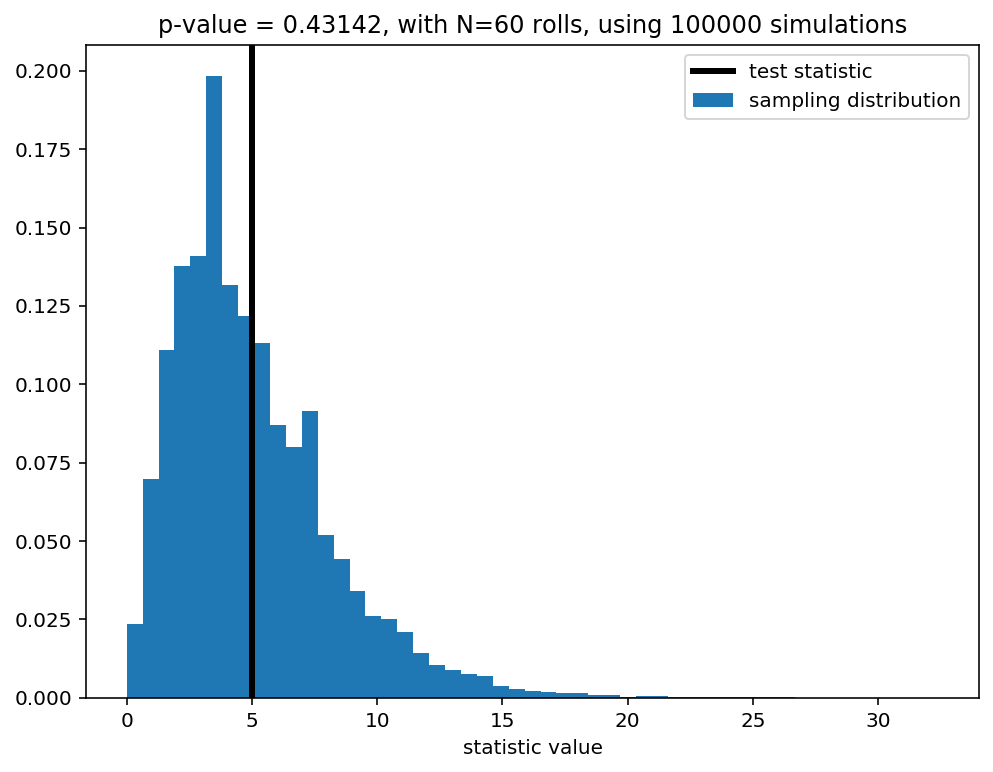

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(sampling_distribution, 51, density=True, label='sampling distribution')
ax.set_xlabel('statistic value')
ax.set_title(f'p-value = {p_value}, with N={num_rolls} rolls, using {num_simulations} simulations')
ax.axvline(x=test_statistic, linewidth=3, c='k', ls='-', label='test statistic')
ax.legend();

Look at the p-value, and see how that makes sense given the plot.

# Fisher's significance testing
The **p-value** is the proportion of times we expect to get a test statistic as extreme, or more extreme, than the obtained statistic from our dataset, based upon theoretically re-running our experiment an infinite number of times.

This is the area of the sampling distribution to the right of the test statistic.

This approach is called "proof by contradiction" - we propose the null hypothesis and test to see if the data are likely given the null hypothesis.

But how convincing is this? Does this tell us anything about $H_1$.

This p-value is graded in that the value can be between 0-1:

- high values mean: it is _very likely_ to observe test statistics this extreme or higher according to $H_0$
- low values mean: it is _less likely_ to observe test statistics this extreme or higher according to $H_0$

However it is recommended that a threshold p-value (or critical p-value) is used to determine what is 'meaningful'. So we would go from a graded level of evidence to a binary decision of whether a p-value is meaningful. BUT, under the Fisherian approach we _can_ still talk about the p-value in a graded matter. Fisher's approach uses the critical p-value as a guide, not an absolute rule.

In [27]:
def fisher_threshold_test(sampling_distribution, test_statistic, p=0.05):
    
    print(f"Fisher's threshold test at p={p}:")
    
    # (1-p) * 100 converts desired p-value into a percentile
    critical_value = percentile(sampling_distribution, (1-p) * 100)
    print(f' - Test statistic is {test_statistic}, critical value is {critical_value}')

    if test_statistic >= critical_value:
        print(f' - Test statistic DOES meet or exceed the critical value')
    else:
        print(f' - Test statistic FALLS SHORT of the critical value')
        
    p_value = sum([δ >= test_statistic 
           for δ in sampling_distribution]) / len(sampling_distribution)
        
    print(f'Either way, the p-value of {p_value} can tell you something.')
    print()
    return critical_value

In [28]:
critical_value = fisher_threshold_test(sampling_distribution, test_statistic)

Fisher's threshold test at p=0.05:
 - Test statistic is 5.0, critical value is 11.0
 - Test statistic FALLS SHORT of the critical value
Either way, the p-value of 0.43142 can tell you something.



Plotting this is useful.

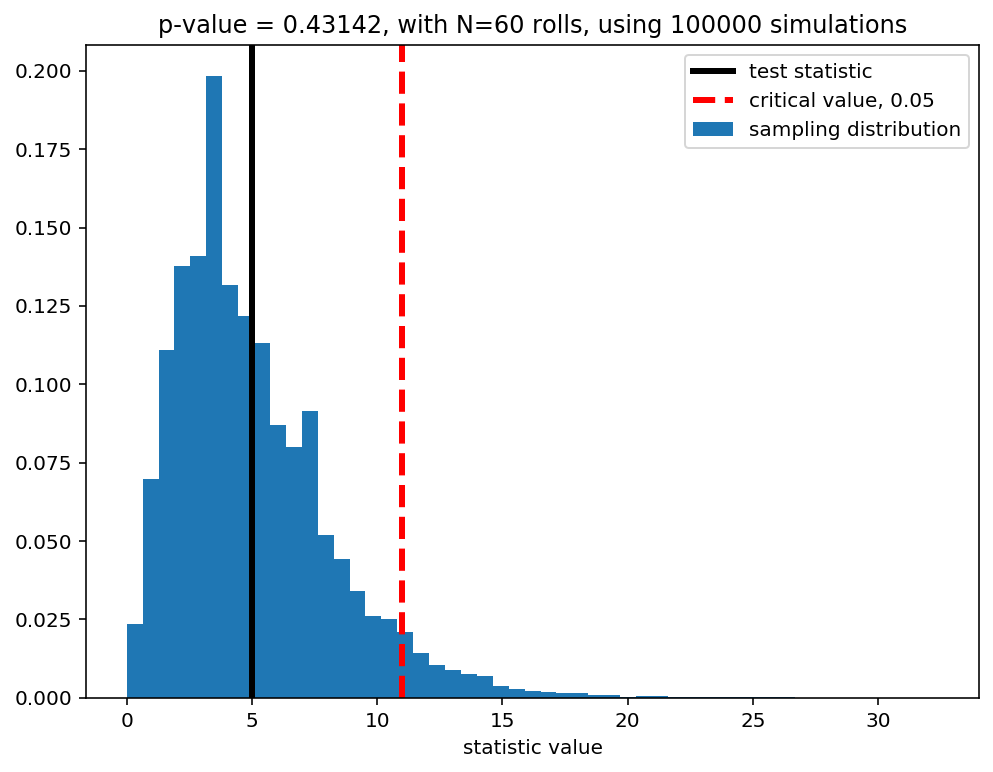

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(sampling_distribution, 51, density=True, label='sampling distribution')
ax.set_xlabel('statistic value')
ax.set_title(f'p-value = {p_value}, with N={num_rolls} rolls, using {num_simulations} simulations')
ax.axvline(x=test_statistic, linewidth=3, c='k', ls='-', label='test statistic')
ax.axvline(x=critical_value, linewidth=3, c='r', ls='--', label='critical value, 0.05')
ax.legend();

Fisher proposed the critical p-value as only part of the process to accept or reject the null hypothesis... Fisher intended the graded p-value to be used with scientific judgement to decide if the level of evidence is sufficiently high to draw a conclusion.

This critical p-value is essentially arbitrary. It differs across scientific disciplines.

## How does the sample size affect the p-value?
Before we move on to look at an alternative approah to hypothesis testing, let's use the simulation approach to get some more insights. By altering the simulations, we can change the sample size and see hwo this affects the sampling distribution.

Number of rolls: 60
expected_data = [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
observed_data = [10.0, 10.0, 10.0, 10.0, 5.0, 15.0]
Fisher's threshold test at p=0.05:
 - Test statistic is 5.0, critical value is 11.0
 - Test statistic FALLS SHORT of the critical value
Either way, the p-value of 0.43019 can tell you something.

Number of rolls: 120
expected_data = [20.0, 20.0, 20.0, 20.0, 20.0, 20.0]
observed_data = [20.0, 20.0, 20.0, 20.0, 10.0, 30.0]
Fisher's threshold test at p=0.05:
 - Test statistic is 10.0, critical value is 11.0
 - Test statistic FALLS SHORT of the critical value
Either way, the p-value of 0.07529 can tell you something.

Number of rolls: 240
expected_data = [40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
observed_data = [40.0, 40.0, 40.0, 40.0, 20.0, 60.0]
Fisher's threshold test at p=0.05:
 - Test statistic is 20.0, critical value is 11.0
 - Test statistic DOES meet or exceed the critical value
Either way, the p-value of 0.00111 can tell you something.



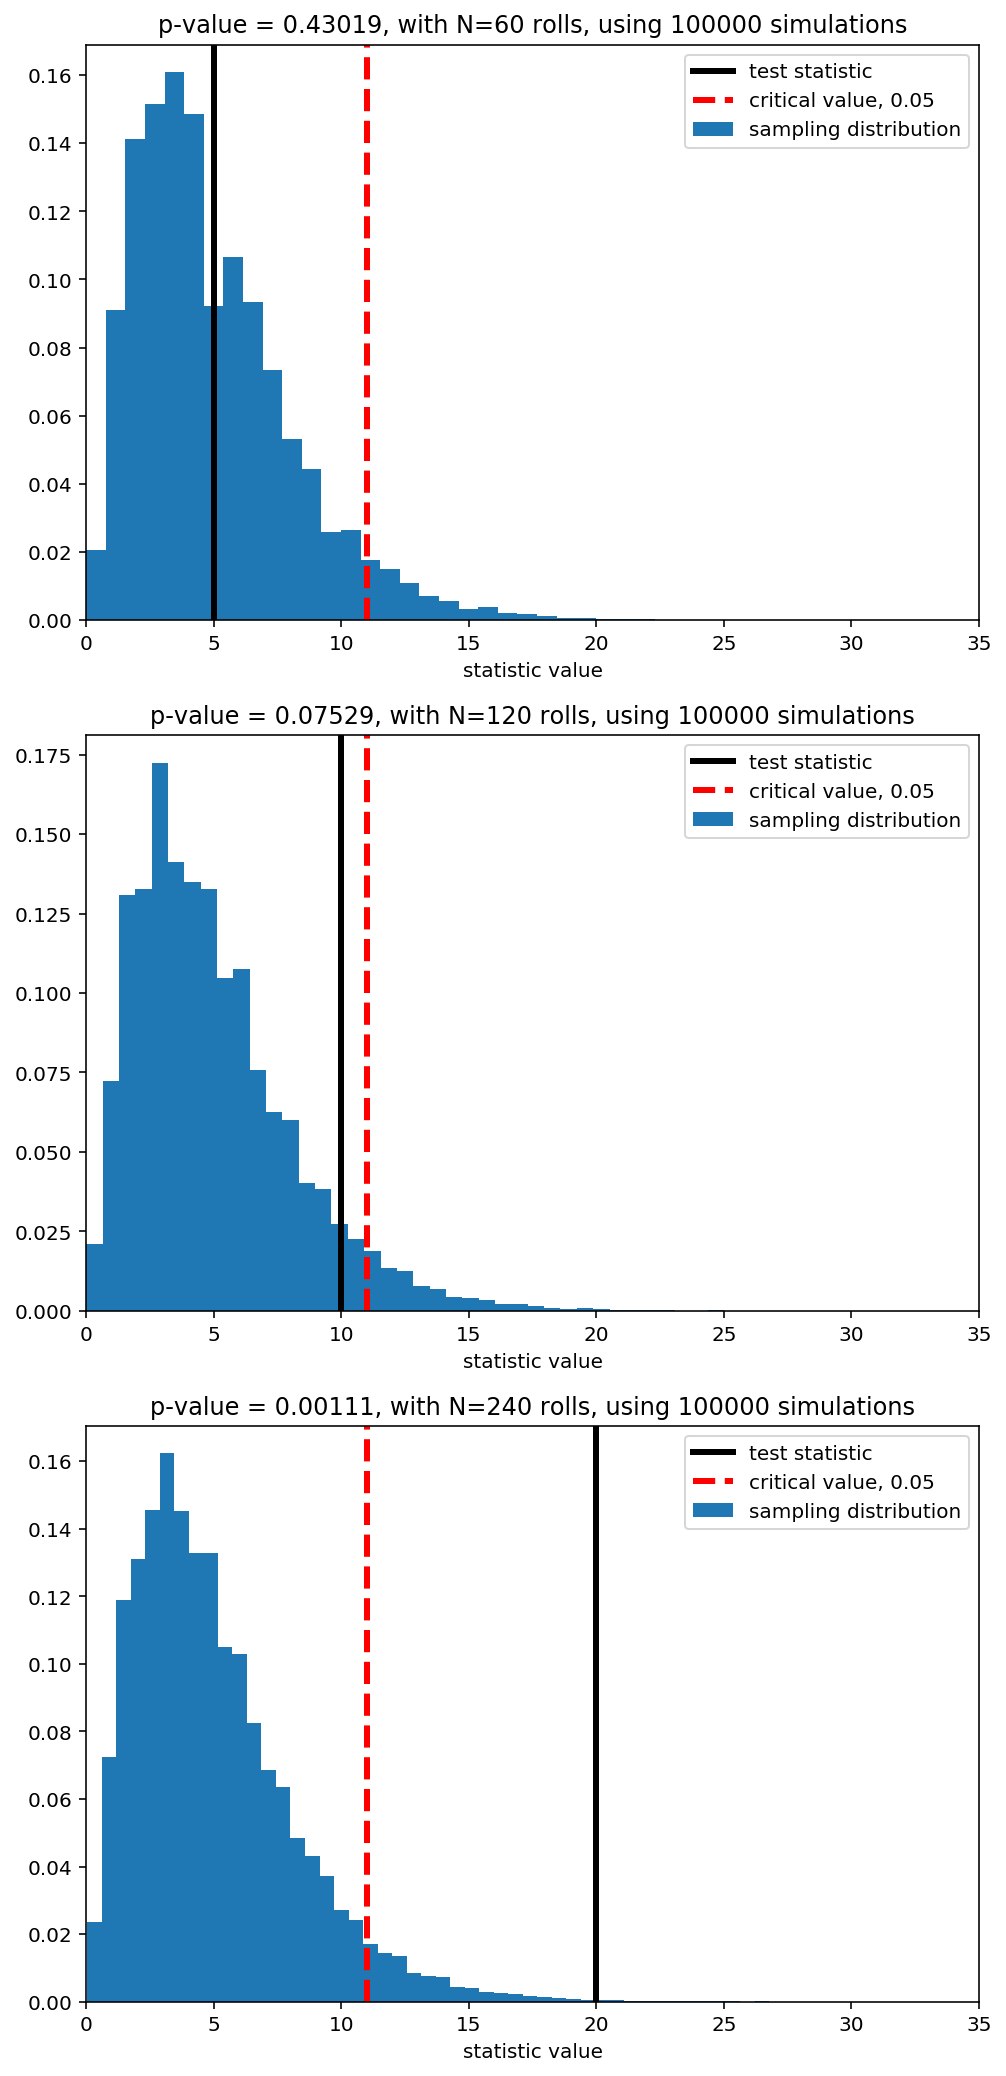

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

sample_sizes = [60, 120, 240]
num_simulations = 100_000
sides = 6

expected_proportion = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
observed_proportion = [2/12, 2/12, 2/12, 2/12, 1/12, 3/12]
# observed_proportion = [1/12, 1/12, 1/12, 1/12, 1/12, 7/12]

for i, num_rolls in enumerate(sample_sizes):
    
    print(f'Number of rolls: {num_rolls}')

    expected_data = [prop * num_rolls for prop in expected_proportion]
    print(f'expected_data = {expected_data}')

    observed_data = [prop * num_rolls for prop in observed_proportion]
    print(f'observed_data = {observed_data}')

    # 1. Calculate threshold statistic value given our data
    test_statistic = ChiSquared(expected_data, observed_data)

    # 2. Calculate what we expect to see under the null hypothesis?
    # Simulate rolling a fair dice many times
    simulated_dataset = [SimulateRolls(sides, num_rolls)
                         for _ in range(num_simulations)]

    # 3. Calculate sampling distribution 
    # We apply the test statistic to all the simulated datasets
    sampling_distribution = [ChiSquared(expected_data, simulated_data) 
                             for simulated_data in simulated_dataset]

    # 4. Calculate the p-value
    # What proportion of times does the sampling distribution exceed the test_statistic?
    p_value = sum([δ >= test_statistic 
                   for δ in sampling_distribution]) / num_simulations
          
    critical_value = percentile(sampling_distribution, 95)
    
    ax[i].hist(sampling_distribution, 51, density=True, label='sampling distribution')
    ax[i].set_xlabel('statistic value')
    ax[i].set_xlim([0, 35])
    ax[i].set_title(f'p-value = {p_value}, with N={num_rolls} rolls, using {num_simulations} simulations')
    ax[i].axvline(x=test_statistic, linewidth=3, c='k', ls='-', label='test statistic')
    ax[i].axvline(x=critical_value, linewidth=3, c='r', ls='--', label='critical value, 0.05')
    ax[i].legend();
    
    fisher_threshold_test(sampling_distribution, test_statistic)

# add some more space between plots to make it look less cluttered
plt.subplots_adjust(hspace=0.2)

We can observe a number of things here:

- The sampling distribution is broadly the same, but it does depend on the sample size.
- The critical value is always the 95th percentile (by convention) of the sampling distribution
- As the sample size increases the test statistic increases even though the data is the same. Look at the p-values in the figure titles!
- When the sample size is 'low', the p-value is high and the test statistic is below the critical level.
- When the sample size is 'medium', the p-value is lower and the test statistic increases towards critical level.
- When the sample size is 'high', the p-value is very low and the test statistic has passed the critical level.

So this is interesting. What we have learnt is that data we get from a biased dice can look very much like a fair dice. For this particular biased dice, this is the case even when the number of rolls is 60 or 120. It takes more data than this for this biased dice to look not like a fair dice - we were able to distinguish the dice from a fair dice with 240 dice rolls worth of data.

# Neyman-Pearson hypothesis testing and $\alpha$

The Neyman-Pearson approach to hypothesis testing is rather different from the approach of Fisher. There are two main differences:

1. Where Fisher proposed only evaluating the data with respect to $H_0$, Neyman and Pearson proposed evaluating the data against both $H_0$ and $H_1$. You would _a priori_ decide on $H_1$, and so make a decision about what effect size you expect to see. This require more work up front on (power analysis) _before_ you carry out the statistical tests.

2. P-values are no longer considered as graded levels of evidence. Instead, we have critical statistic values which define _decisions_ to accept or reject $H_0$. Placement of the critical values determine the long run rate of making correct or incorrect decisions about $H_0$ being accepted or rejected. So a key property is that we control the long run error rates of these inferential decisions.

It is important to emphasise here that, under the Neyman-Pearson approach:

- We have a binary decision of accept or reject the null hypothesis. 
- We are still _not_ accepting $H_1$, we are only accepting or rejecting $H_0$.
- We know the long run frequency that we will make the wrong decision.
- But we do _not_ know if _our_ decision based on _our_ data is a correct or incorrect decision!
- The exact p-value is irrelevant in their approach and should _not_ be treated as a graded level of how consisistent the data is with $H_0$.

#### The null hypothesis $H_0$

We have already looked in detail at the null hypothesis distribution, which we called the sampling distribution. As we said, this is the distribution of statistic values we expect to see under the null hypothesis. We have looked in detail how to create this kind of distribution.

However, the Neyman-Pearson approach also involves specifying an alternative hypothesis, $H_1$. This requires us to make decisions about the strength of the effect _a priori_ (in advance of seeing the data).

![](figs/np.png)

![](figs/type-1-2-errors.png)

We still have the concept of a critical test statistic value (see vertical line). This is the same as before, we might decide that this lies at the 95th percentile of the distribution. This gives is **Type 1 error rates**, which is the probability of wrongly rejecting the null hypothesis, and happens at a rate $\alpha=0.05$ (typically). This can be thought of as a **false alarm** in that you suspect the presence of an effect when the null hypothesis is in fact true. 

That is, if you observe a test statistic greater than the critical value then you would decide to reject the null hypothesis. You can say, "I am rejecting the null hypothesis because there is only a 5% chance (given a theoretical infinite number of repeated experiments) of getting a test-statistic this extreme (or more) under the null hypothesis."

Another way of saying this however, is that you _do_ expect to see a test statistic this extreme (or more) 5% of the time you repeat the same experiment.

Yes you have controlled your Type 1 error rate (false alarms), but you do not know for sure if you have made a correct or incorrect decision.

- Does this give you a feeling that reproducing experiments is important?

This is _not_ the same as saying there is a 95% chance that the null hypothesis is wrong.

#### The alternative hypothesis $H_1$

But there is more than one kind of error that can be made here. It is also possible make a **miss**, where you do not reject $H_0$ when it is in fact false. This is a **Type II error rate**, and also also known as $\beta$.

The **statistical power** of an experiment is $1-\beta$, so the smaller $\beta$ (the Type II error rate), the more powerful your experiment. That is, a more powerful experiment will have a higher probability of correctly rejecting $H_0$. 

**SOMETHING TO THINK ABOUT:** Where does the alternative hypothesis distribution come from?

# G*Power for Neyman-Pearson hypothesis testing

G*Power is software you can download to help with power analysis calculations.

The screenshot below shows:

- we are running a t-test to look at the difference between two independent groups
- we are _a priori_ specifying $\alpha=0.05, \beta=0.05$, and and effect size $d=0.5$, and an equal number of participants in each group

The output tell us:

- the critical t-value
- the sample size required is $N=176$, 88 participants per group

![](figs/gpower-ttest.png)

We can also get G*Power to demonstrate how the required sample size varies with a different range of required power levels. This is good to do _in advance_ of your study so that you can understand the trade-off between the time/effort/cost of collecting data and the corresponding statistical power.

![](figs/gpower-ttest-graph.png)

#### Some criticisms of Neyman-Pearson hypothesis testing _[see Dienes (2008)]_

**Inference consists only of acceptance or rejection of $H_0$** The approach controls long run error rates of making a decision, but the output of the approach is a black or white accept/reject. Do we believe that there is a sharp threshold at which we should come to a different scientific inference? Data would seems to provide graded evidence for or against hypotheses.

**Null hypothesis testing encourages weak theorising** While it is easy to specify the null hypothesis, this requires little or no thinking about the alternative hypothesis.

# Misconceptions about p-values

## The P-value is not the strength of an effect
P-values only tells you about how surprising the data is compared to $H_0$.

## P-values are not the probability of replicating an effect
P-values depend on the sample size. The p-values varies a lot across lots of repeated small studies.

## A small p-value does not favour your hypothesis
A low p-value only means that the data is surprising given the null hypothesis. It does not say anything about an actual hypothesis.

## The p-value is not the probability of the null hypothesis being true
It is the probability of observing the data given the null hypothesis is true. This is the likelihood or consistency of the data with the null hypothesis, $P(data|H_0)$. This is not the same as the probabilty of the null hypothesis being true given the data: $P(data|H_0) \neq P(H_0|data)$.

# Summary

- You can do traditional hypothesis testing in two ways.
- Fisher's approach allows for graded p-values which represent "the probability of obtaining a test statistic as extreme (or more) under the null hypothesis, assuming a theoretically infinite set of repeated identical experiments."
- Neyman-Pearson hypothesis testing involves both $H_0$ and $H_1$, and the focus is on arriving at an accept or reject $H_0$ decision. In this approach, the graded p-value has no meaning.
- If you are not specifying an alternative hypothesis and carrying out power calculations, then you are not doing Neyman-Pearson hypothesis testing.
- Hypothesis testing involves the deductive calculation of what you would expect to see under $H_0$, and optionally $H_1$ under the Neyman-Pearson approach. This involves describing distributions of test statistics. Typically these are calculated analytically, but we can also calculate these using simple simulation methods.
- None of these methods allow us to assign probabilities to hypotheses. This is what many scientists want to do. This requires a Bayesian approach. Nevertheless, traditional hypothesis testing is still 'mainstream' an you need a solid understanding of it to understand and criticise inferences made in the Psychological research literature.

# Resources

- Blog post by Allan Downey: [There is only one test!](http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html)
- Blog post by Allan Downey: [There is still only one test](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html)
- A useful blog post outlining the commonalities amoungst many statistical tests: [Common statistical tests are linear models (or: how to teach stats)](https://lindeloev.github.io/tests-as-linear/)
- Null hypothesis significance testing: a guide to commonly misunderstood concepts and recommendations for good practice https://doi.org/10.12688/f1000research.6963.5

If you are interested in this topic, then I would highly recommend this concise  and easy-to-read textbook:

- Dienes, Z. (2008). Understanding Psychology as a Science: An Introduction to Scientific and Statistical Inference. Palgrave Macmillan.